In [1]:
import pandas as pd 
import seaborn as sns
import numpy  as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sqlalchemy import create_engine

In [2]:
abc = pd.read_excel('./data_files/letter_frequency.xlsx')
abc.head()

,Unnamed: 0,Letter,Frequency of Letters,Proportion
0,0,A,8.4966%,43.31
1,1,B,2.072%,10.56
2,2,C,4.5388%,23.13
3,3,D,3.3844%,17.25
4,4,E,11.1607%,56.88


In [3]:
abc.dtypes

Unnamed: 0                int64
Letter                   object
Frequency of Letters     object
Proportion              float64
dtype: object

In [4]:
abc.drop(columns= 'Unnamed: 0',  inplace=True)
abc.head()

,Letter,Frequency of Letters,Proportion
0,A,8.4966%,43.31
1,B,2.072%,10.56
2,C,4.5388%,23.13
3,D,3.3844%,17.25
4,E,11.1607%,56.88


In [5]:
abc['Frequency of Letters'] = abc['Frequency of Letters'].apply(lambda x: x.split('%')[0])

In [6]:
abc['Frequency of Letters'] = abc['Frequency of Letters'].astype(float)

In [7]:
abc.dtypes

Letter                   object
Frequency of Letters    float64
Proportion              float64
dtype: object

C:\Users\sreno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


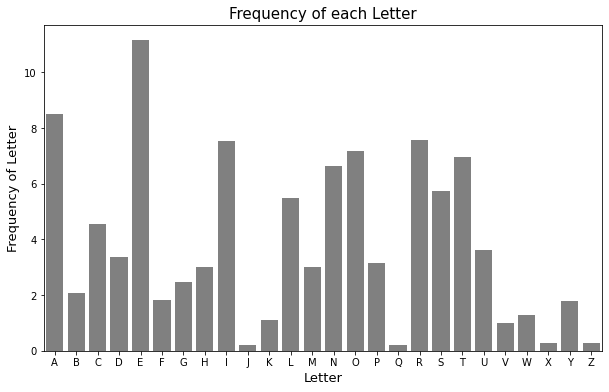

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(abc['Letter'], abc['Frequency of Letters'], color='gray')
plt.title('Frequency of each Letter', fontsize=15)
plt.xlabel('Letter', fontsize=13)
plt.ylabel('Frequency of Letter', fontsize=13)
plt.show()

## Use Python or SQL to display the top 5 most common letters along with their frequencies and proportions

### Renaming the Feq col as of gives an error later on 

In [9]:
abc.rename(columns={'Frequency of Letters':'Frequency'}, inplace=True)

In [10]:
# create sqlite engine
engine = create_engine('sqlite:///abc.db', echo=True)
# create connection to engine
conn = engine.connect()

2021-11-20 14:13:54,100 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2021-11-20 14:13:54,100 INFO sqlalchemy.engine.base.Engine ()
2021-11-20 14:13:54,101 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2021-11-20 14:13:54,102 INFO sqlalchemy.engine.base.Engine ()


In [11]:
# add the dataframe as a table in sqlite
sqlite_table = "abc"
abc.to_sql(sqlite_table, conn, if_exists='fail')


2021-11-20 14:13:54,824 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("abc")
2021-11-20 14:13:54,824 INFO sqlalchemy.engine.base.Engine ()
2021-11-20 14:13:54,825 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("abc")
2021-11-20 14:13:54,826 INFO sqlalchemy.engine.base.Engine ()
2021-11-20 14:13:54,828 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE abc (
	"index" BIGINT, 
	"Letter" TEXT, 
	"Frequency" FLOAT, 
	"Proportion" FLOAT
)


2021-11-20 14:13:54,828 INFO sqlalchemy.engine.base.Engine ()
2021-11-20 14:13:54,870 INFO sqlalchemy.engine.base.Engine COMMIT
2021-11-20 14:13:54,870 INFO sqlalchemy.engine.base.Engine CREATE INDEX ix_abc_index ON abc ("index")
2021-11-20 14:13:54,871 INFO sqlalchemy.engine.base.Engine ()
2021-11-20 14:13:54,893 INFO sqlalchemy.engine.base.Engine COMMIT
2021-11-20 14:13:54,895 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2021-11-20 14:13:54,896 INFO sqlalchemy.engine.base.Engine INSERT INTO abc ("index", "Letter", "Frequency

In [12]:
abc.head()

,Letter,Frequency,Proportion
0,A,8.4966,43.31
1,B,2.0720,10.56
2,C,4.5388,23.13
3,D,3.3844,17.25
4,E,11.1607,56.88


In [13]:
# Write your SQL query in this string
sql = """
SELECT Letter, Frequency, Proportion
FROM abc
ORDER BY Frequency DESC
"""
# Read the sql query into pandas to view the results
df = pd.read_sql_query(sql, engine)
df.head()


2021-11-20 14:13:59,302 INFO sqlalchemy.engine.base.OptionEngine 
SELECT Letter, Frequency, Proportion
FROM abc
ORDER BY Frequency DESC

2021-11-20 14:13:59,303 INFO sqlalchemy.engine.base.OptionEngine ()


,Letter,Frequency,Proportion
0,E,11.1607,56.88
1,A,8.4966,43.31
2,R,7.5809,38.64
3,I,7.5448,38.45
4,O,7.1635,36.51


## Use Python or SQL to display the 5 least common letters along with their frequencies and proportions

In [14]:
# Write your SQL query in this string
sql = """
SELECT Letter, Frequency, Proportion
FROM abc
ORDER BY Frequency ASC
"""
# Read the sql query into pandas to view the results
df = pd.read_sql_query(sql, engine)
df.head()


2021-11-20 14:14:01,728 INFO sqlalchemy.engine.base.OptionEngine 
SELECT Letter, Frequency, Proportion
FROM abc
ORDER BY Frequency ASC

2021-11-20 14:14:01,729 INFO sqlalchemy.engine.base.OptionEngine ()


,Letter,Frequency,Proportion
0,Q,0.1962,1.00
1,J,0.1965,1.00
2,Z,0.2722,1.39
3,X,0.2902,1.48
4,V,1.0074,5.13


# Filter the dataset to just show rows for vowels (A, E, I, O, U)

In [15]:
vowels = abc[abc['Letter'].isin(['A', 'E','I','O','U'])]
vowels

,Letter,Frequency,Proportion
0,A,8.4966,43.31
4,E,11.1607,56.88
8,I,7.5448,38.45
14,O,7.1635,36.51
20,U,3.6308,18.51


# Part 2 Model Prediction

In [18]:
letter_data = pd.read_csv('./data_files/train.csv')
letter_data.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
letter_data.isna().any().any()

False

## For visualization

In [20]:
letter_data['letter'].value_counts().sort_index()

0     11062
1      6888
2     18731
3      8101
4      9106
5       942
6      4644
7      5734
8       881
9      6799
10     4482
11     9273
12     9910
13    15199
14    46164
15    15547
16     4596
17     9251
18    38769
19    18004
20    23256
21     3311
22     8693
23     5035
24     8711
25     4871
Name: letter, dtype: int64

In [21]:
X = letter_data.drop(columns='letter')
y= letter_data['letter']

In [22]:
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state=42)

In [23]:
X_train = np.array(X_train)
X_test = np.array(X_test)


X_train  = X_train / 255
X_test = X_test / 255


X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [24]:
y_train = to_categorical(y_train, num_classes=26)
y_test = to_categorical(y_test, num_classes=26)

<AxesSubplot:>

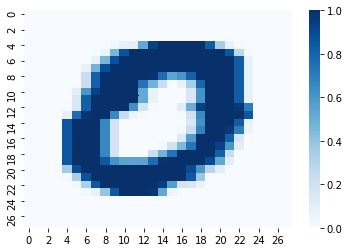

In [25]:
sns.heatmap(X_train[0].reshape(28,28),cmap="Blues") 

### Thought it would be cooler to see more than just one letter so after looking it up I used some of the code from this [link](https://www.kaggle.com/tarunkr/digit-recognition-tutorial-cnn-99-67-accuracy?scriptVersionId=43089496&cellId=23). But still used heatmaps over the plt fuction they used 

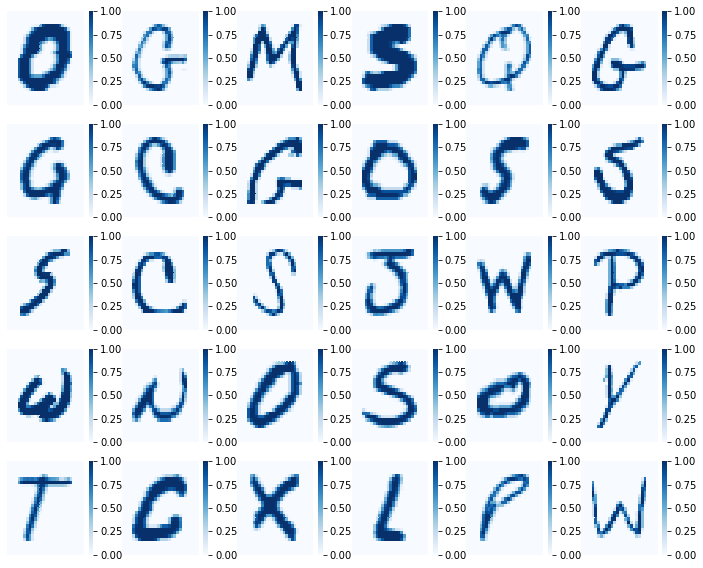

In [26]:
rows = 5 
cols = 6 

f = plt.figure(figsize=(2*cols,2*rows))

for i in range(rows*cols):
    f.add_subplot(rows,cols,i+1) 
    sns.heatmap(X_train[i].reshape(28,28),cmap="Blues") 
    plt.axis("off")

In [27]:
letter_graph = letter_data['letter'].value_counts().sort_index()
letter_graph.rename({
    0: 'a', 1: 'b',2: 'c',3:'d',4:'e',5: 'f', 6: 'g',7: 'h', 8:'I', 9:'j', 10: 'k',11: 'L', 12:'m', 13:'n',
    14: 'o',15: 'p', 16:'q', 17:'r',18: 's', 19: 't',20: 'u', 21:'v', 22:'w', 23: 'x',24: 'y', 25:'z'
    }, inplace=True)
letter_graph.drop(columns='index', inplace=True)
letter_graph = letter_graph.reset_index()

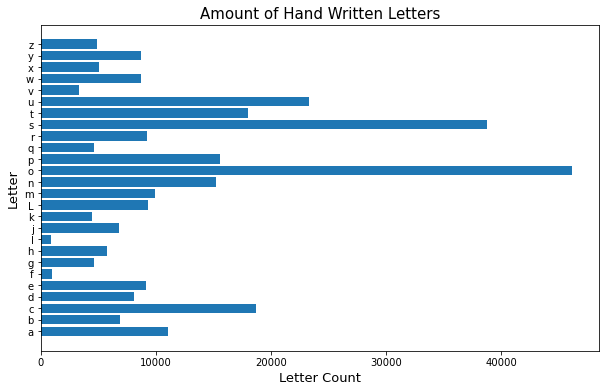

In [28]:
plt.figure(figsize=(10,6))
plt.barh(letter_graph['index'], letter_graph['letter'])
plt.title('Amount of Hand Written Letters',fontsize=15)
plt.xlabel('Letter Count',fontsize=13)
plt.ylabel('Letter',fontsize=13)
plt.show()

## Models and predictions

In [29]:
input_shape = X_train.shape[1:4]

In [30]:
model = Sequential()

model.add(Conv2D(filters = 15, kernel_size=5,  input_shape = input_shape))

model.add(Conv2D(filters = 10, kernel_size=3,  input_shape = input_shape))


model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

early_stopping = EarlyStopping(patience=5)

model.add(Dense(26, activation='softmax'))

In [31]:
#compile model
model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics= ['acc'])

In [32]:
#step 3 fit
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs =10)

Epoch 1/10
6984/6984 [==============================] - 57s 8ms/step - loss: 0.2486 - acc: 0.9310 - val_loss: 0.1457 - val_acc: 0.9588
Epoch 2/10
6984/6984 [==============================] - 58s 8ms/step - loss: 0.1274 - acc: 0.9646 - val_loss: 0.1279 - val_acc: 0.9646
Epoch 3/10
6984/6984 [==============================] - 58s 8ms/step - loss: 0.1090 - acc: 0.9693 - val_loss: 0.1155 - val_acc: 0.9679
Epoch 4/10
6984/6984 [==============================] - 63s 9ms/step - loss: 0.0991 - acc: 0.9723 - val_loss: 0.1063 - val_acc: 0.9705
Epoch 5/10
6984/6984 [==============================] - 62s 9ms/step - loss: 0.0915 - acc: 0.9742 - val_loss: 0.1110 - val_acc: 0.9689
Epoch 6/10
6984/6984 [==============================] - 61s 9ms/step - loss: 0.0863 - acc: 0.9755 - val_loss: 0.1033 - val_acc: 0.9712
Epoch 7/10
6984/6984 [==============================] - 62s 9ms/step - loss: 0.0812 - acc: 0.9770 - val_loss: 0.0985 - val_acc: 0.9731
Epoch 8/10
6984/6984 [==============================] -

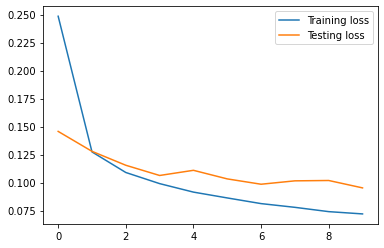

In [33]:
plt.plot(history.history['loss'], label= 'Training loss')
plt.plot(history.history['val_loss'], label= 'Testing loss')
plt.legend();


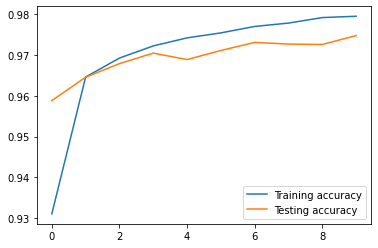

In [34]:
plt.plot(history.history['acc'], label= 'Training accuracy')
plt.plot(history.history['val_acc'], label= 'Testing accuracy')
plt.legend();


In [35]:
print(f'Training: {model.evaluate(X_train, y_train)}')
print(f'Testing: {model.evaluate(X_test, y_test)}')

6984/6984 [==============================] - 17s 2ms/step - loss: 0.0587 - acc: 0.9836
Training: [0.05870005488395691, 0.9836174845695496]
2328/2328 [==============================] - 6s 3ms/step - loss: 0.0953 - acc: 0.9748
Testing: [0.09525082260370255, 0.9748154282569885]


In [36]:
testing_data = pd.read_csv('./data_files/test.csv')
testing_data.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74490 entries, 0 to 74489
Columns: 785 entries, letter to 0.648
dtypes: int64(785)
memory usage: 446.1 MB


In [38]:
testing_data.isna().any().any()

False

In [39]:
X = testing_data.drop(columns='letter')

In [40]:
X = np.array(X)

X  = X / 255


X= X.reshape(X.shape[0], 28, 28, 1)


In [41]:
X.shape

(74490, 28, 28, 1)

In [42]:
preds = model.predict_classes(X)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [43]:
preds

array([22,  1,  7, ..., 22,  0, 19], dtype=int64)

## Not sure if theres a better way to do this I did some reseach but couldnt find what I was looking for. On the Exam page it says to calculate the accuracy for the testing data. To do this I labeled each step below on how I did this with a mathmatical approach. In summary I took all the predictions determined if they matched the original value in the testing data. Then took the total number of correct letters and divided that by the amount of total letters/rows (74490) to get the accuracy score of the predicted values. 

###      Number of correct  /  Total Possible 

#### New dataframe to check for score from the testing data

In [44]:
Final_preds_eval = pd.DataFrame({'letter' : testing_data['letter'], 'predicted letter': preds })

#### Creates new column to check if the prediction was correct or not all values start as False but will be changed later

In [45]:
Final_preds_eval['case']  ='False'

#### Checks if the original letter matches the predicted letter and changes the False value to True if it matches

In [46]:
Final_preds_eval.loc[Final_preds_eval['letter'] == Final_preds_eval['predicted letter'], 'case' ] = 'True'

#### The split of correct and incorect predictions

In [47]:
Final_preds_eval['case'].value_counts()

True     72640
False     1850
Name: case, dtype: int64

#### Correct Answers divided by the total number of possible answers

In [48]:
print(f'Testing accuracy: {72613 / 74490}')

Testing accuracy: 0.9748019868438716
